# Project: No_Show_Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

This is a No Show Appointment dataset from kaggle

This dataset collects information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their medical appointment. It would be used to answer some questions like what is the most likely factor that makes patient no show up for their appointment.

Each of the rows has the following 14 features.

> 1. PatientId: Identification of a patient
> 2. AppointmentID: Identification of each appointment
> 3. Gender: Male or Female . Female is the greater proportion, woman takes way more care of their health in comparison to man.
> 4. AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
> 5. ScheduledDay: tells us on what day the patient set up their appointment..
> 6. Age: How old is the patient.
> 7. Neighborhood: indicates the location of the hospital.
> 8. Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> 9. Hipertension: True or False
> 10. Diabetes: True or False
> 11. Alcoholism: True or False
> 12. Handcap: True or False
> 13. SMS_received: 1 or more messages sent to the patient.
> 14. No-show: The target either True or False. True as in the patient did not show and No as in the patient show.


### Questions to be answered with the dataset

> 1. Group Age into categories and identify which category of the age didn't show up most
> 2. Are many of the patient on Scholarship?
> 3. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [162]:
# Import the necessary libraries needed to be able to perform the data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [163]:
# Load your data and print out a few lines. Perform operations to inspect data 
#   types and look for instances of missing or possibly errant data.
df_noshow = pd.read_csv('No_Show_Appointment.csv')

In [164]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [165]:
df_noshow.shape

(110527, 14)

> The data consists of 110527 samples with 14 columns (features)

In [166]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [167]:
df_noshow.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> From the info() method it is observed that the number of dataset in each column is complete which shows that there is no missing data.  

> Also, from this, we found out that some of the datatypes are not  correct such as the PatientID which is in float would be changes to int, schedule and appointment Day are in Object which would be changed to datetime datatype. Other datatypes are correct. 

In [168]:
# To confirm the number rows that are duplicates
df_noshow.duplicated().sum()

0

> This shows that there is no duplicated values in the dataset


### Data Cleaning
 

> After discussing the structure of the data and any problems that need to be cleaned, I perform the cleaning in the cell(s) below

In [169]:
# Change the PatientId datatype from float to int

df_noshow['PatientId'] = df_noshow['PatientId'].astype(int)

In [170]:
# Change the AppointmentDay and ScheduledDay to datetime datatype

df_noshow['ScheduledDay'] = pd.to_datetime(df_noshow['ScheduledDay'])
df_noshow['AppointmentDay'] = pd.to_datetime(df_noshow['ScheduledDay'])

In [171]:
# Rename the Hipertension column name to Hypertension to have a correct column name

df_noshow = df_noshow.rename(columns = {'Hipertension': 'Hypertension'})

In [172]:
# To confirm the datatype and the name change, use info method again

df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


> This shows that all the dataset has been investigated and cleaned

<a id='eda'></a>
## Exploratory Data Analysis

In [173]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [174]:
df_noshow.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [175]:
# Firstly, lets find the ratio of those that did not show to those that show
No_show = df_noshow['No-show'].value_counts()
No_show

No     88208
Yes    22319
Name: No-show, dtype: int64

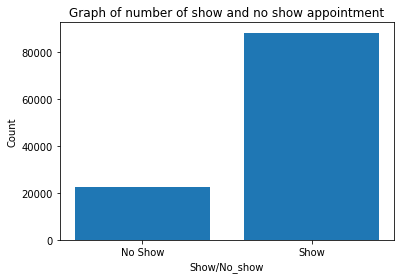

In [176]:
plt.bar(x= ['Show', 'No Show'], height = No_show)
plt.title("Graph of number of show and no show appointment")
plt.xlabel("Show/No_show")
plt.ylabel("Count");

22319 which is around 20% of the total appointment received didn't show up for their appointment as scheduled

In [177]:
# Let's compare the genders to know the gender that made an appointment most
Gender_count = df_noshow['Gender'].value_counts()
Gender_count

F    71840
M    38687
Name: Gender, dtype: int64

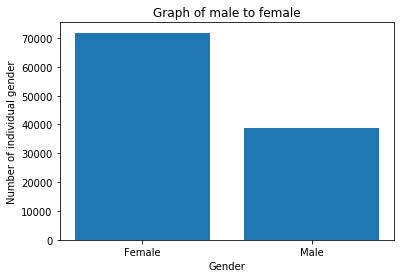

In [178]:
plt.bar(x= ['Female', 'Male'], height = Gender_count)
plt.title("Graph of male to female")
plt.xlabel("Gender")
plt.ylabel("Number of individual gender");

> The graph shows that there are 71840 females appointment as compared to 38687 male

In [179]:
# Filter the dataset by gender with the no show column to know which gender did not show up more
df_noshowF = df_noshow[(df_noshow['Gender']== 'F') & (df_noshow['No-show']== 'Yes')]
df_noshowF.shape

(14594, 14)

In [180]:
df_noshowM = df_noshow[(df_noshow['Gender']== 'M') & (df_noshow['No-show']== 'Yes')]
df_noshowM.shape

(7725, 14)

In [181]:
print('This shows that {:.4}% of the female appointments received did not show up and\n{:.4}% of the male appointments received did not show up'.format(1459400/71840, 772500/38687))

This shows that 20.31% of the female appointments received did not show up and
19.97% of the male appointments received did not show up


> From this analysis, we can see that the proportion of No show to the total appointment received for gender is greater in female than male (14594: 7725)

> Although, the number of appointment received for female is approximately 86% greater than that of male 

### Research Question 1: Group Age into categories and identify which category of the age didn't show up most

In [182]:
# Analysing the Age column
df_noshow['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [183]:
df_noshow['Age'].value_counts().head()

0     3539
1     2273
52    1746
49    1652
53    1651
Name: Age, dtype: int64

> From the exploration, we observed that the oldest age of appointment received is 115years old with 5 samples, the minimum age received is -1. This minimum age is unrealistic as it is impossible to have a negative age. Therefore, we may consider removing this row to have an accurate analysis.

> Also, it was observed that infant of age 0 yr old (below a year old) has the highest number of appointment received with 3539 samples

In [184]:
# Drop the rows that has Age= -1 
df_noshow = df_noshow.drop(df_noshow[df_noshow['Age'] == -1].index)

In [185]:
df_noshow.shape

(110526, 14)

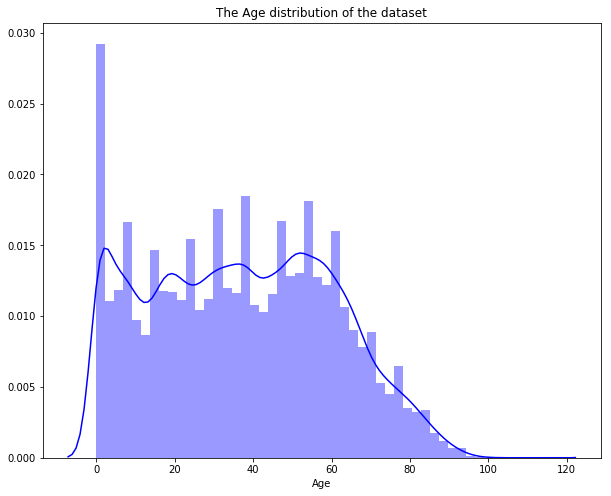

In [186]:
# Let's check the distribution of the age in the dataset

plt.figure(figsize = (10, 8))
sns.distplot(df_noshow['Age'], color = 'blue', norm_hist = True);
plt.title("The Age distribution of the dataset");

> This shows that the age of appointment scheduled is not normally distributed as it is skewed to the right.

Grouping age into categories to have the view of the category of age that booked the medical appointment most and and which categories did not show up most.

> 0-14 - Children,
> 15-24 - Youth,
> 25-64 - Adult,
> 65 & above - Seniors

In [187]:
# df_noshow['Age_cat'] = df_noshow.apply(lambda x: 'Children' if x['Age'] <= 14 else 'Youth' if x['Age'] <= 24 else 'Adult' if x['Age'] <= 64 else 'Seniors', axis = 1)

In [188]:
# Create a new column name Age_cat to group the age

def Age_cat(Age):
    if Age <= 14:
        return 'Children'
    elif Age <= 24:
        return 'Youth'
    elif Age <= 64:
        return 'Adult'
    else:
        return 'Senior'
        
df_noshow['Age_cat'] = df_noshow.apply(lambda x: Age_cat(x['Age']),axis=1)

In [189]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


In [190]:
# Lets view the amount of appointment received for each of the Age group
Age_cat = df_noshow['Age_cat'].value_counts()
Age_cat

Adult       58857
Children    23257
Senior      14402
Youth       14010
Name: Age_cat, dtype: int64

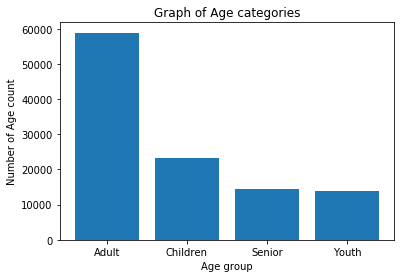

In [191]:
plt.bar(x= ['Adult', 'Children', 'Senior', 'Youth'], height = Age_cat)
plt.title("Graph of Age categories")
plt.xlabel("Age group")
plt.ylabel("Number of Age count");

> Majority of the appointment received are from Adult of ages between 25-64 yrs old, which is over 50% of the total appointment

> Also, 23257 appointments was received for children of age between 0-14 yrs which is the second age group of appointment received.

##### Lets views the categories of ages that didn't show up most within the age group. This will let us to get more insight into the dataset

In [192]:
df_noshow_Children = df_noshow[(df_noshow['Age_cat'] == 'Children') & (df_noshow['No-show'] == 'Yes')]
df_noshow_Children.shape

(4926, 15)

In [193]:
df_noshow_Youth = df_noshow[(df_noshow['Age_cat'] == 'Youth') & (df_noshow['No-show'] == 'Yes')]
df_noshow_Youth.shape

(3540, 15)

In [194]:
df_noshow_Adult = df_noshow[(df_noshow['Age_cat'] == 'Adult') & (df_noshow['No-show'] == 'Yes')]
df_noshow_Adult.shape

(11620, 15)

In [195]:

df_noshow_Senior = df_noshow[(df_noshow['Age_cat'] == 'Senior') & (df_noshow['No-show'] == 'Yes')]
df_noshow_Senior.shape

(2233, 15)

> It can be inferred from the analysis above that approximately 25% of the Youth, 21% of the children, 20% of the Adult, and 16% of the senior appointment received did not show up for their medical schedule.

> From this, we can deduce that, the youth didn't show up most for their appointment this can be due to some factors which can be detected with further analysis.

> Also, it is obvious that majority of the seniors show up for their appointment with around 84% turn up rate. Although the number of appointment received for people in this category is small compared to other, their turn up rate shows the important of their appointment to them which may be due to their old age.

##### Exploring other variables such as 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'

### Research Question 2: Are many of the patient on Scholarship?

In [196]:
# Lets find the number of patient on scholarship and see the number of those that were on scholarship that did not show.
df_noshow_sch = df_noshow['Scholarship'].value_counts()
df_noshow_sch

0    99665
1    10861
Name: Scholarship, dtype: int64

In [197]:
# Let's find the number of people on scholarship that didn't show up for their appointment
df_scholarship = df_noshow[(df_noshow['Scholarship'] ==1) & (df_noshow['No-show'] == 'Yes')]
df_scholarship.shape

(2578, 15)

In [198]:
df_noscholarship = df_noshow[(df_noshow['Scholarship'] ==0) & (df_noshow['No-show'] == 'Yes')]
df_noscholarship.shape

(19741, 15)

> Just around 10% (10861) of the total appointment received are on scholarship of which around 24% didn't show up. Around 90% of the total population didn't received any scholarship of which around 20% didn't show up. From this, we can deduce that having a scholarship is not really a factor for determining whether an appointment scheduled would be honored. This is due to the fact that the proportion of scholarship to no show is > no scholarship and no show.


### Research Question 3: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [199]:
df_noshow.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Age_cat'],
      dtype='object')

> After exploring the gender, scholarship, and Age, we would need to explore other variables to know their impact on the possibility of showing  up or not for their scheduled appointment.


Let's explore the impact of 'Hypertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received' on no-show variables

##### Hypertensive and No-show

In [200]:
# Checking if hypertension affect the possibility of showing for the appointment

# Let's find the number of patient that have hypertension
df_noshow['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

In [201]:
# Let's know the number of the patient that are hypertensive and didn't show up and those that are not 
# hypertensive and didn't show up
df_noshowHYP1 = df_noshow[(df_noshow['Hypertension'] == 1) & (df_noshow['No-show'] == 'Yes')]
df_noshowHYP1.shape

(3772, 15)

In [202]:
df_noshowHYP0 = df_noshow[(df_noshow['Hypertension'] == 0) & (df_noshow['No-show'] == 'Yes')]
df_noshowHYP0.shape

(18547, 15)

> Around 20% (21801) of the appointment received are hypertensive patient of which 3772 which is around 17% did not show up for their appointment. Also, 80% (88725) of the patient are non-hypertensive and around 21%  of them didn't show up. 

> With this, we can deduce that the patient hypertensive status did not have a significant impact on the patient decision to show up or not.

##### Diabetes and No-show

In [203]:
# Checking if Diabetes affect the possibility of showing for the appointment

# Let's find the number of patient that have Diabetes
df_noshow['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [204]:
# Let's know the number of the patient that have diabetes and didn't show up and those that 
# do not have diabetes and didn't show up

df_noshowDIA1 = df_noshow[(df_noshow['Diabetes'] == 1) & (df_noshow['No-show'] == 'Yes')]
df_noshowDIA1.shape

(1430, 15)

In [205]:
df_noshowDIA0 = df_noshow[(df_noshow['Diabetes'] == 0) & (df_noshow['No-show'] == 'Yes')]
df_noshowDIA0.shape

(20889, 15)

> With this, we can see that larger percentage (92%) of the appointment received are not from diabetic patient. Only 18% of those that have diabetes didn't show up and 20% of those that didn't have diabetes did not show up.

##### Alcoholism and No-show

In [206]:
# Checking if Alcoholism affect the possibility of showing up for the appointment

# Let's find the number of patient that have hypertension
df_noshow['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [207]:
# Let's know the number of the patient that are on alcohol and didn't show up and those that 
# are not and didn't show up

df_noshowALC1 = df_noshow[(df_noshow['Alcoholism'] == 1) & (df_noshow['No-show'] == 'Yes')]
df_noshowALC1.shape

(677, 15)

In [208]:
df_noshowALC0 = df_noshow[(df_noshow['Alcoholism'] == 0) & (df_noshow['No-show'] == 'Yes')]
df_noshowALC0.shape

(21642, 15)

> The larger percentage (97%) of the patient are not on alcohol, which shows that alcoholism is not a factor that can be used to predict if a patient would show up or not for their appointment

##### Handicap and No-show

In [209]:
# Checking if been Handicap affect the possibility of showing up for the appointment

# Let's find the number of patient that are handicap
df_noshow['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [210]:
# Let's know the number of the patient that are on alcohol and didn't show up and those that 
# are not and didn't show up

df_noshowHAND1 = df_noshow[(df_noshow['Handcap'] == 1) & (df_noshow['No-show'] == 'Yes')]
df_noshowHAND1.shape

(366, 15)

In [211]:
df_noshowHAND2 = df_noshow[(df_noshow['Handcap'] == 2) & (df_noshow['No-show'] == 'Yes')]
df_noshowHAND2.shape

(37, 15)

In [212]:
df_noshowHAND3 = df_noshow[(df_noshow['Handcap'] == 3) & (df_noshow['No-show'] == 'Yes')]
df_noshowHAND3.shape

(3, 15)

> For this handicap colmumn, each of the values are not properly defined. Therefore, we cannot draw conclusion on this. We need to know what 1,2, and 3 represent. with this, we would be able to draw proper inference from it

##### SMS_received and No-show

In [213]:
# Checking if been the number of SMS received affect the possibility of showing up for the appointment

# Let's find the categories of patient based on the number of SMS received 
df_noshow['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [214]:
# Let's know the number of the patient that are on alcohol and didn't show up and those that 
# are not and didn't show up

df_noshowSMS1 = df_noshow[(df_noshow['SMS_received'] == 1) & (df_noshow['No-show'] == 'Yes')]
df_noshowSMS1.shape

(9784, 15)

In [215]:
df_noshowSMS0 = df_noshow[(df_noshow['SMS_received'] == 0) & (df_noshow['No-show'] == 'Yes')]
df_noshowSMS0.shape

(12535, 15)

> Considering the percentage of the number of patient and the amount SMS received, we can deduce the effect of whether the patient sms or not on no show for the appointment.

> From the data, we can see that 32% (35382) of the total appointment scheduled received SMS while 68% of them do not. Also, we find out that 28% of those that received the SMS do not show up for their appointment and 17% of those that do not receive SMS do not show up. Although, these are high percentage rate, but it didn't really show us the effectiveness of SMS received in predicting if a particular patient would honor their scheduled appointment or not. Because, if the proportion of those that received SMS in respect to no show is greater than that of those that didn't received SMS and no show (28% (9784) > 17% (12535), then we cannot say that receiving SMS impact the decision of the patient to show up or not.

<a id='conclusions'></a>
## Conclusions

> Exploring the data gave us some insight into the data as we compared some of the variables to the No-show variable.
>> Variables such as Gender, Age, Scholarship, Hypertension, Diabetes, Alcoholism, and Handcap are the independent variables and No-show is the dependent variable.

>> From the analysis, we can see that variables such as Scholarship, Hypertension, Diabetes, and Alcoholism are not the variables that can be used to predict if a patient scheduled for appointment would show up or not. This is evident from the proportional on the percentage of the variables with no-show. In most of this proportion, patient with scholarship and didn't show up is greater than that of the without scholarship and didn't show up. 
>> Also, Having those limitation in terms of Hypertension, diabetes, alcoholism, and handicap is not a factor that can be used for the prediction as well as analysed individually up there.

####  Limitation on the project:

1. The Handcap variable that is supposed to be boolean, happen to have multiple input values (0 to 4) and the SMS_received variables that is suppose to have a multiple input has a boolean data. An explanation on this discripancies could help us to have a good insight into the data.
2. The proximity of the patient residence to the neighborhood is not given. This can also be a factor to consider, knowing the distance from the patient residence to the neighbourhod can let us know if the patient can easily found her way to the appointment center.
3. The Appointment date and Scheduled date is the same, we need some clarifications on this, is the scheduled date same as appointment date? If so, why do we need to send an SMS to them again when the appointment date is the same as the scheduled day.


<a id='submitting'></a>
## Submitting your Project 

In [216]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset - No_Show_Appointment.ipynb'])

0